# Heart Disease
## Cause and identification of heart disease.
<h5> This analysis is to identify how different medical condition and biological factor contribute to having heart disease among patients by answering some question such as:</h5>

- How does each factor contribute to having heart disease.
- Is heart disease different between gender.
- How does age contribute to having heart diease.
## Dataset:
<p>Source: Kaggle datasets</p>

# Importing libraries and loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
sns.set(color_codes = True)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
df = pd.read_csv("C:\\Users\\OWNER\\Downloads\\archive.zip")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## A summary of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


This shows the summary statistics of our numerical data, which include the measures of central tendency and Quantiles.
Obviously there is no outlier detected or anomaly in the data.

# Data exploration

In [5]:
def stacked_bar(var1, var2):
    a = pd.crosstab(df[var1], df[var2])
    f = pd.DataFrame(a)
    for i in range(len(f)):
        f.iloc[i] = f.iloc[i] / f.iloc[i].sum() * 100.00
    d = f.plot(kind = 'bar', stacked = True)
    for d in d.patches:
        plt.annotate(round(d.get_height(),1),
                     ((d.get_x() + d.get_width() / 2) * 0.96, (d.get_y() + d.get_height() / 2 )* 0.99),
                    color = 'white')

def my_bar(var):
    plt.bar(df[var].value_counts().index, df[var].value_counts())

### Chest pain Type

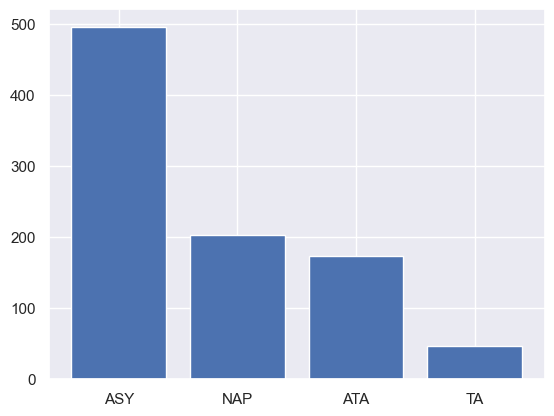

In [6]:
my_bar("ChestPainType")

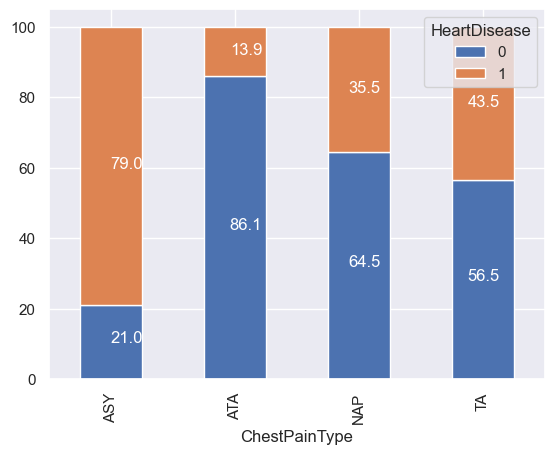

In [7]:
stacked_bar( "ChestPainType","HeartDisease")

<p> The above chart shows us how Chest pain type affects heart disease, and we can see that it is more likely for ASY type patient to have heart disease as only 21% of these patients does not have the disease.</p> 
<p>Next to it is the TA type this set of patient also have high rate of the disease as only 56.5% of them do not have. The disease is also common among the NAP type as they have 35.5% of them carrying the disease.</p>
<p>Obviously it is least common among the ATA type as only 13.9% of them are carrying the disease.</p>

### REstingECG

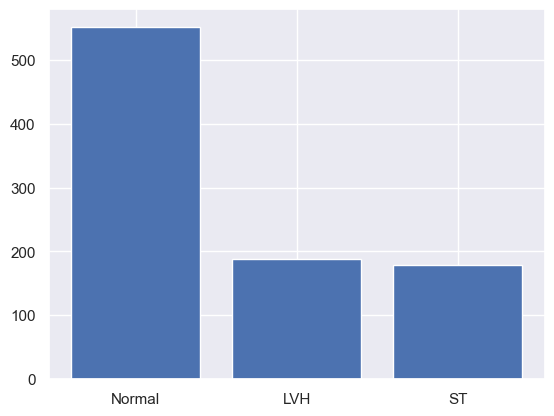

In [8]:
my_bar("RestingECG")

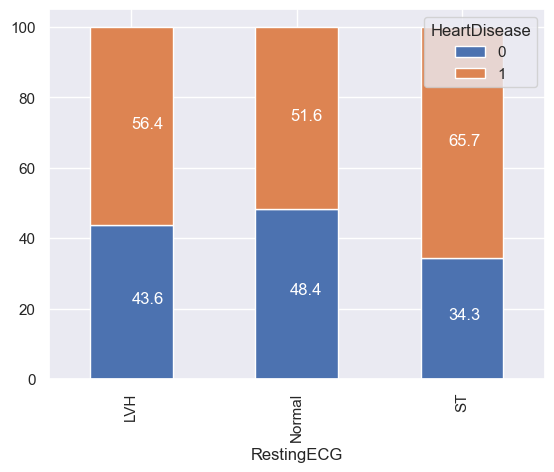

In [9]:
stacked_bar("RestingECG", "HeartDisease")

<p>The Resting ECG is slightly different from on group to another, with ST group having a significant variation which shows that patients with ST group are most likely to have the disease as up to 65.7% of patients in this group has the disease.</p>
<p>And for the LVH group there to be more carriers than Non-carriers of the disease as up to 56.45 carrier in this group. </p>
<p>Normal group seem normal as there is only slightly few more carriers than Non-carriers with 51.6% carrier.</p>

## ExerciseAngina

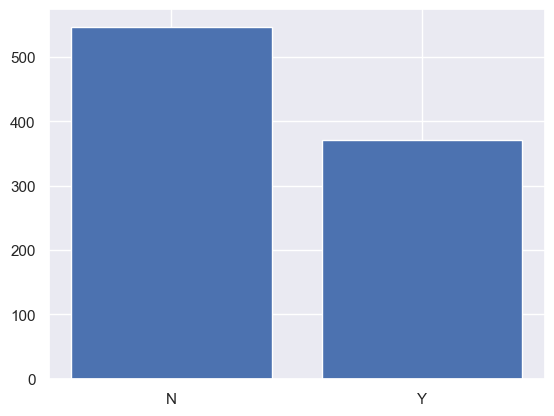

In [10]:
my_bar("ExerciseAngina")

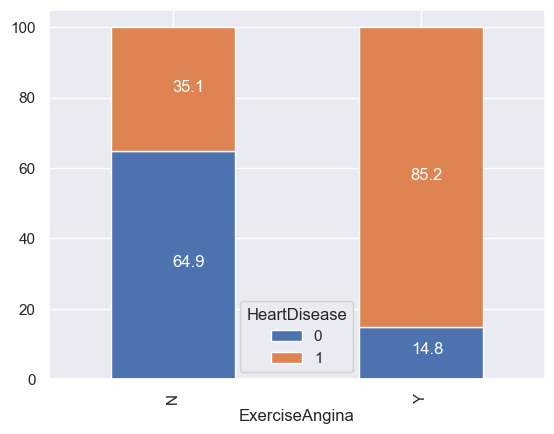

In [11]:
stacked_bar("ExerciseAngina", "HeartDisease")

This is an obvious variation as we can observe that the rate of the disease in Y is way more than it is in N. It also show that patients with Y tends to carry the disease with up to 85.2% carrying the disease. For N, the patients tends to be negative to the disease with only 35.1 carriers of the disease among them.

## Sex

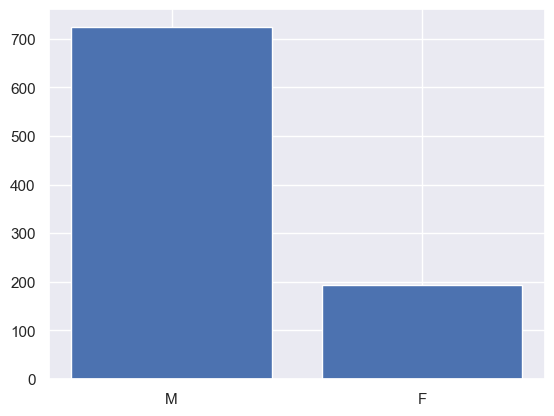

In [12]:
my_bar("Sex")

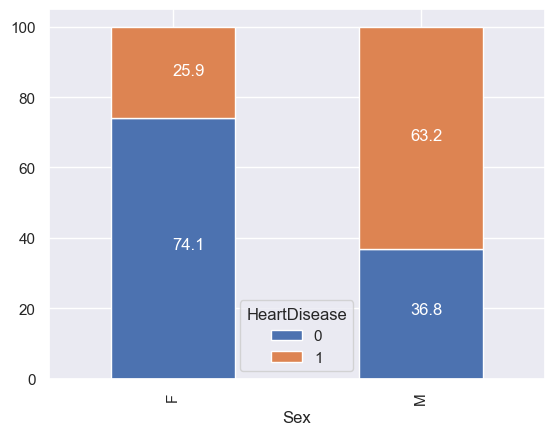

In [13]:
stacked_bar("Sex", "HeartDisease")

 The rate of the disease is very high among male meaning that male are more likely to have the disease than female are, with male having up to 63.2% of them having the disease.
 <p>Notice that the variation in sex is simillar to that of Exercise angina is there any relationship among them let's check that out</p>
 

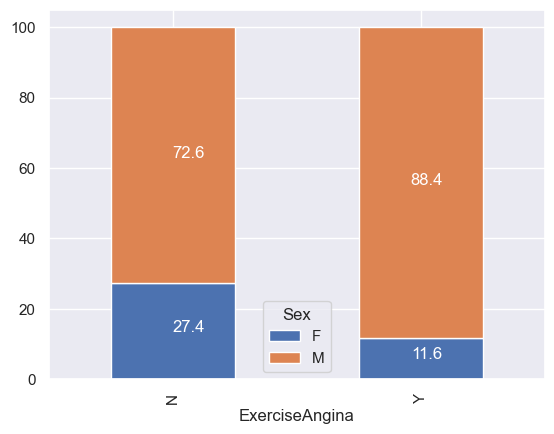

In [14]:
stacked_bar("ExerciseAngina", "Sex")

Nothing much just shows there are more males than females in the study

## ST SLOPE

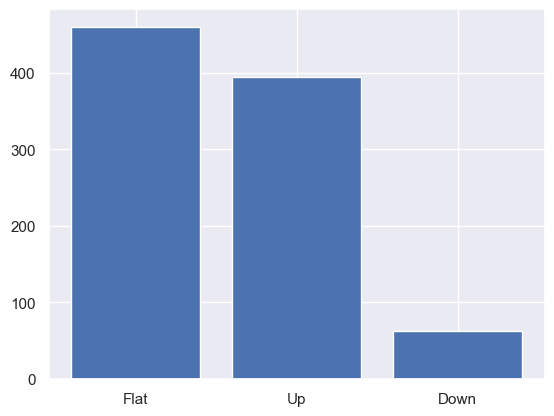

In [15]:
my_bar("ST_Slope")

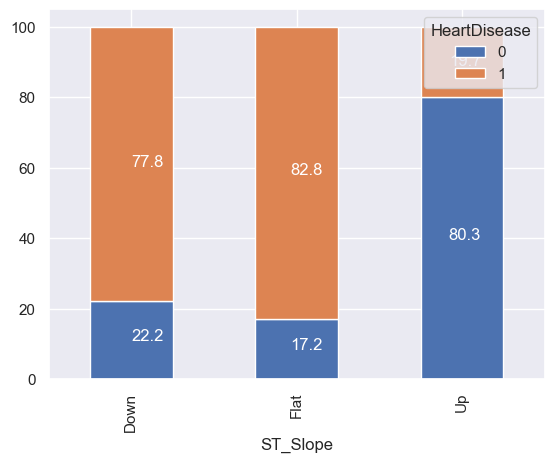

In [16]:
stacked_bar("ST_Slope", "HeartDisease")

Patients with down tend to have the disease with up to 77.8% of them carrying the disease. For patients with flat they are even more likely to carry the disease than Down patient with 82.8% of them carrying the disease.But for Up patients they tends not having the disease with only 19.7% of them carrying it.

## FastingBS

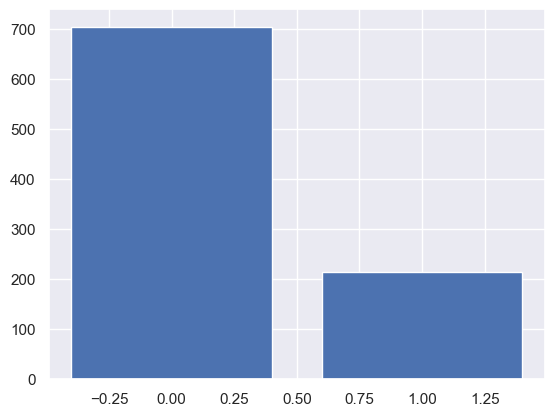

In [17]:
my_bar("FastingBS")

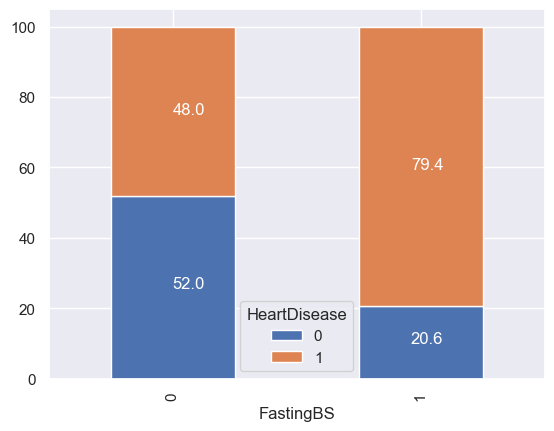

In [18]:
stacked_bar("FastingBS", "HeartDisease")

Patients that have fastingBs also tend to have the heart disease as 79.4% of patients having Fasting Bs are also carrying the disease. While there tend to be a slight shift towards being negative amongst the patients that don't havee FastingBs.

## Age

<Axes: xlabel='HeartDisease', ylabel='Age'>

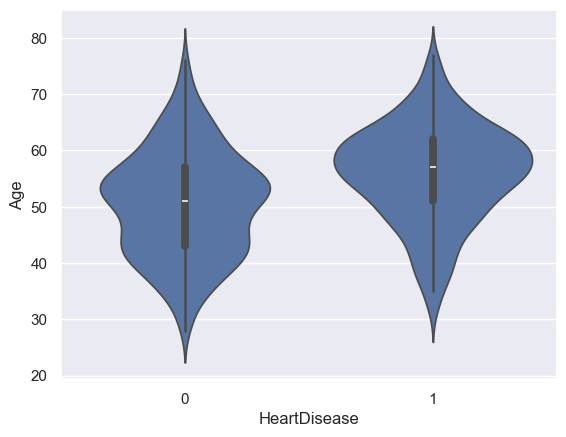

In [19]:
sns.violinplot(x = "HeartDisease", y = "Age", data = df
              )

<Axes: xlabel='HeartDisease', ylabel='Age'>

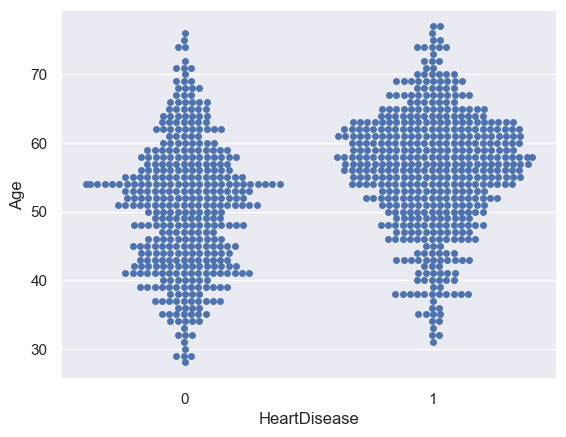

In [20]:
sns.swarmplot(x = "HeartDisease", y = "Age", data = df
              )

 from this we can deduce that heart disease is more common among older people with median age of around 58 years old. And commonly found around the age of 45 to 65. While for patients that don't have the disease, the age has more and wider variabilty, and tend to have cluster a bit lower than that of the carriers showing that younger people are more likely no to have the disease.

## RESTINGBP

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

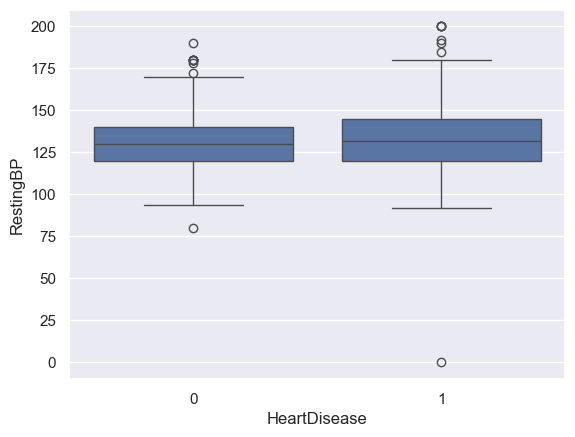

In [21]:
sns.boxplot(x = "HeartDisease", y = "RestingBP", data = df)

There is only a slight difference betwen the two categories of patients here, The median and variability of the patients caryying the disease is just slightly higher than that of the non-carriers. Hence, we can say RestingBP have no effect on having heart disease

## Cholesterol

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

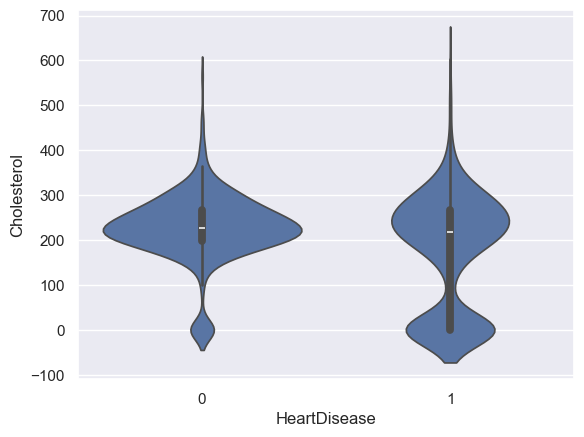

In [22]:
sns.violinplot(x = "HeartDisease", y = "Cholesterol", data = df)

The cholestrol of Patients having heart disease tend to be clustered around two points: Around 0 and around 200-300

## Oldpeak

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

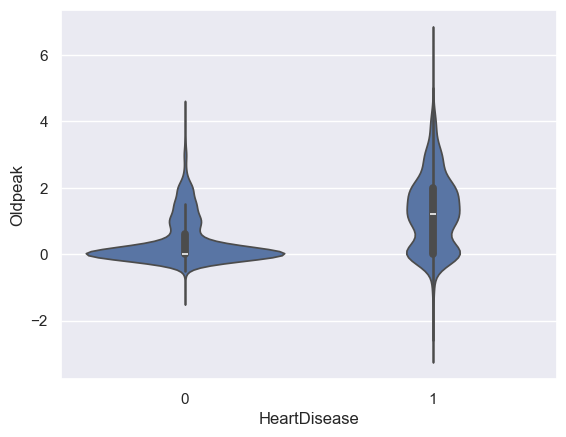

In [23]:
sns.violinplot(x = "HeartDisease", y = "Oldpeak", data = df)

This is an obvious relationship the Oldpeak of Non-carriers tends to be around 0 - 2, while that of the carrier spreads out from -0.5 to 4.
this shows that patients with Maxhr close to zero tends to be non-carriers while patients above or below zero tend to be carriers of the disease.

## Max HR

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

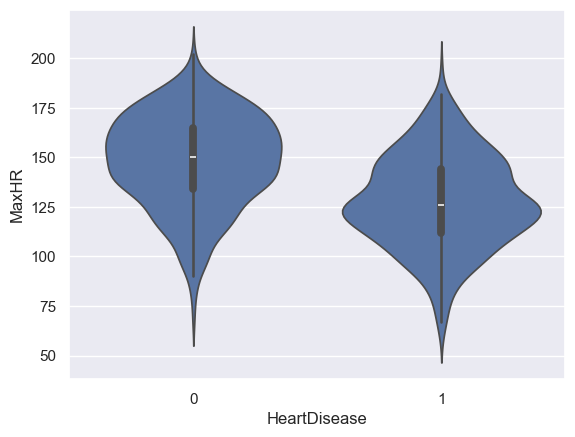

In [24]:
sns.violinplot(x = "HeartDisease", y = "MaxHR", data = df)

The higher the Max hr the lower they tend to have the disease. As observed here the disease is common among people who have low Max hr as the median of the carrier is around 125 which is way lower than that of the non-carrier which is 150. 

# Model creation

Since all variable has effect on heart disease except RestingBP we shall create model to get the likelihood of patient getting the disease.

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [26]:
le = LabelEncoder()
mod = [LogisticRegression(), SVC(), DecisionTreeClassifier()]

In [27]:
df_obj = df.select_dtypes(exclude = ["int64", "float64"], include = "object")
df_obj

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [28]:
df_obj["Sex"] = le.fit_transform(df_obj['Sex'])
df_obj["ChestPainType"] = le.fit_transform(df_obj['ChestPainType'])
df_obj["RestingECG"] = le.fit_transform(df_obj['RestingECG'])
df_obj["ExerciseAngina"] = le.fit_transform(df_obj['ExerciseAngina'])
df_obj["ST_Slope"] = le.fit_transform(df_obj['ST_Slope'])

In [29]:
df_obj

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [30]:
df_int = df.select_dtypes(exclude = 'object')
df_int

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [31]:
x = pd.merge(df_int, df_obj, right_index = True, left_index = True)

In [32]:
x.pop("RestingBP")

0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: RestingBP, Length: 918, dtype: int64

In [33]:
x.head()

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,289,0,172,0.0,0,1,1,1,0,2
1,49,180,0,156,1.0,1,0,2,1,0,1
2,37,283,0,98,0.0,0,1,1,2,0,2
3,48,214,0,108,1.5,1,0,0,1,1,1
4,54,195,0,122,0.0,0,1,2,1,0,2


In [34]:
y = x.pop("HeartDisease")

In [35]:
for model in mod:
    for i in range(5):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
        model.fit(x_train, y_train)
        t = model.score(x_test, y_test)
        print(model,":", t)

LogisticRegression() : 0.8188405797101449
LogisticRegression() : 0.8695652173913043
LogisticRegression() : 0.822463768115942
LogisticRegression() : 0.8115942028985508
LogisticRegression() : 0.8478260869565217
SVC() : 0.7065217391304348
SVC() : 0.7246376811594203
SVC() : 0.6992753623188406
SVC() : 0.7717391304347826
SVC() : 0.7536231884057971
DecisionTreeClassifier() : 0.7971014492753623
DecisionTreeClassifier() : 0.7789855072463768
DecisionTreeClassifier() : 0.8079710144927537
DecisionTreeClassifier() : 0.7789855072463768
DecisionTreeClassifier() : 0.7717391304347826


From the above results we can see that Logistic regression is the best model for this study so we'll move on to build a logistics regression model.

In [51]:
model = LogisticRegression(max_iter = 100, penalty = 'none')

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(penalty='none')

In [53]:
pred = model.predict(x_test)

<Axes: >

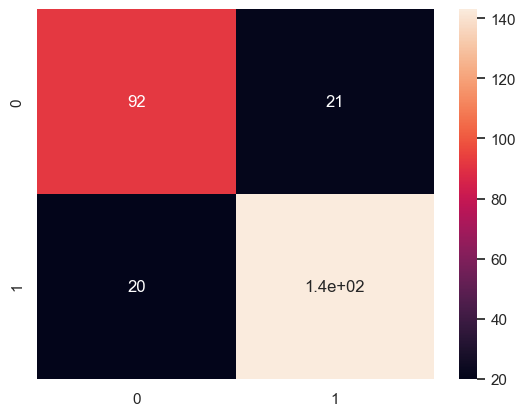

In [54]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, pred), annot = True)

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       113
           1       0.87      0.88      0.87       163

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276

